In [11]:
import mne
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift

## Plot cz

In [19]:
files = glob.glob('../data/bids/derivatives/preprocess_ffr/sub-*/*fif.gz')
epochs = None
for i, file in enumerate(files):
    sub = re.findall('sub-(\d{1,2})', file)[0]
    if int(sub) in [2, 3, 4, 5, 6, 7, 8, 9, 10, 33, 37]:
        continue

    sub_epochs = mne.read_epochs(file)
    if epochs == None:
        epochs = sub_epochs
    else:
        epochs = mne.concatenate_epochs([epochs, sub_epochs])
    # break

Reading /project/hcn1/Letty/expectations-ffr/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-expectations_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3852 matching events found
No baseline correction applied
0 projection items activated
Reading /project/hcn1/Letty/expectations-ffr/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-expectations_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
4219 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
8071 matching events found
Applying baseline correction (mode: mean)
Reading /project/hcn1/Letty/expectations-ffr/analysis/../data/bids/derivatives/preprocess_ffr/sub-34/sub-34_task-expectations_run-1_desc-f

In [20]:
# Adjust timestamp by computed event lag
adjusted_events = epochs.events
adjusted_events[:, 0] = adjusted_events[:,0] + 67
epochs.events = adjusted_events

Need more than one channel to make topography for eeg. Disabling interactivity.


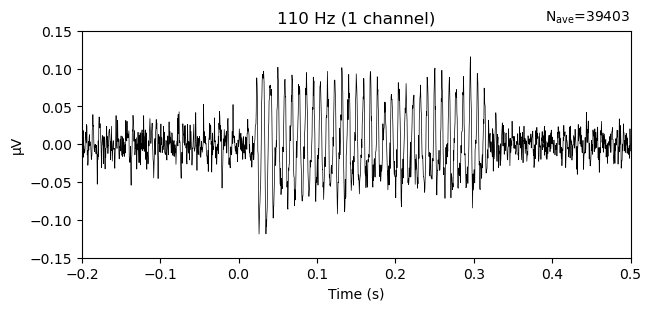

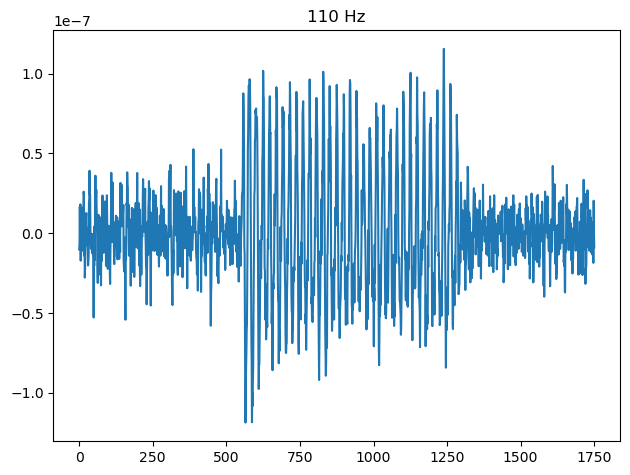

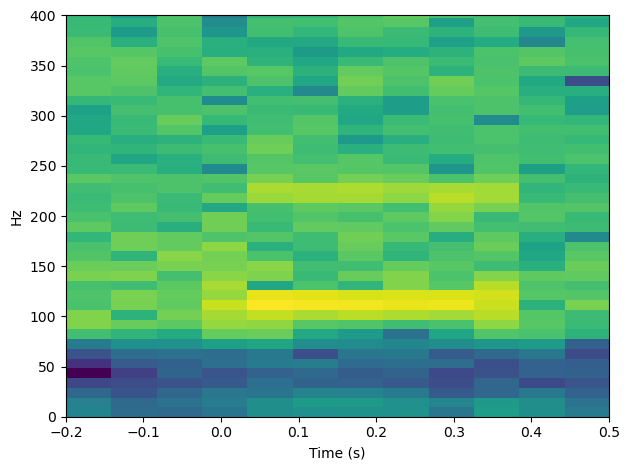

In [21]:
fs = 2500

cz_110 = epochs['11', '21', '31', '41', '51', '61'].average()
fig = cz_110.plot(titles = '110 Hz', ylim=dict(eeg=[-0.15, 0.15]))
fig.savefig('../figs/FFR-tone-1-time-domain.png')
x = cz_110.get_data()
x = x.flatten()
plt.plot(x)
plt.tight_layout()
plt.savefig('../figs/FFR-tone-1-time-domain-2.png')
plt.title('110 Hz')
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs, xextent = (-0.2, 0.5))
plt.ylim(0, 400)
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.tight_layout()
plt.savefig('../figs/FFR-tone-1-spectrogram.png')
plt.show()

Need more than one channel to make topography for eeg. Disabling interactivity.


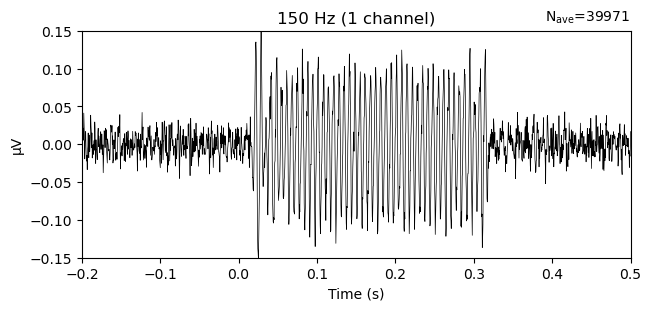

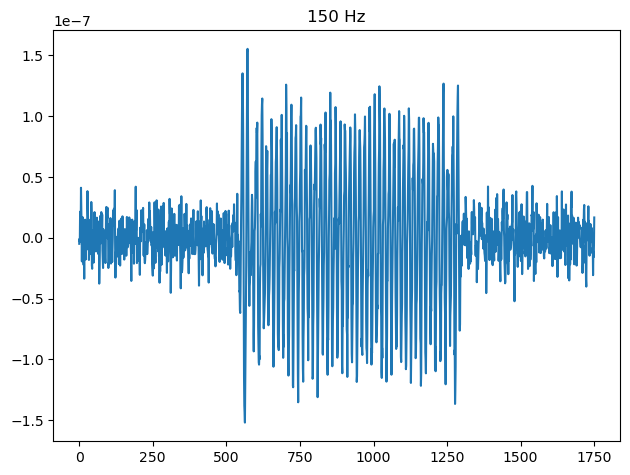

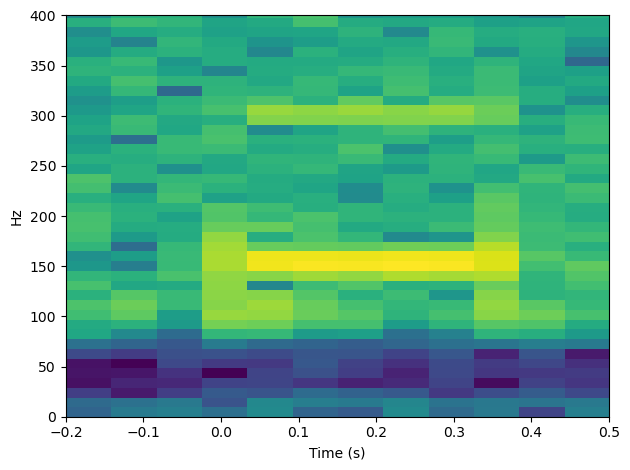

In [22]:
cz_150 = epochs['12', '22', '32', '42', '52', '62'].average()
fig = cz_150.plot(titles = '150 Hz', ylim=dict(eeg=[-0.15, 0.15]))
fig.savefig('../figs/FFR-tone-2-time-domain.png')
x = cz_150.get_data()
x = x.flatten()
plt.plot(x)
plt.tight_layout()
plt.savefig('../figs/FFR-tone-2-time-domain-2.png')
plt.title('150 Hz')
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs, xextent = (-0.2, 0.5))
plt.ylim(0, 400)
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.tight_layout()
plt.savefig('../figs/FFR-tone-2-spectrogram.png')
plt.show()

Need more than one channel to make topography for eeg. Disabling interactivity.


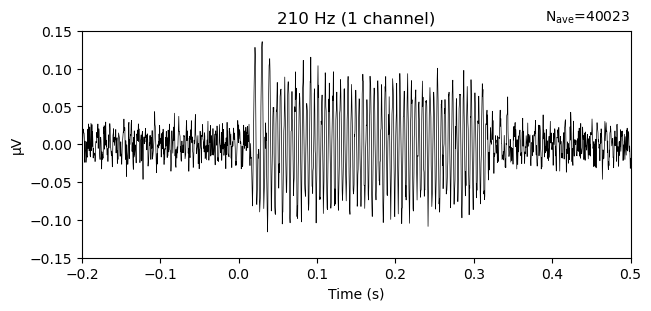

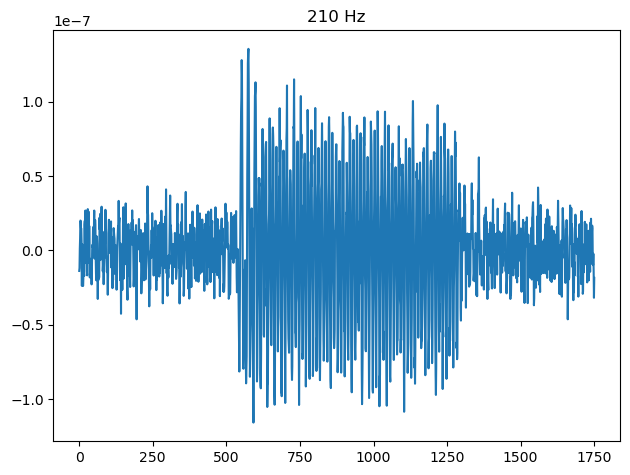

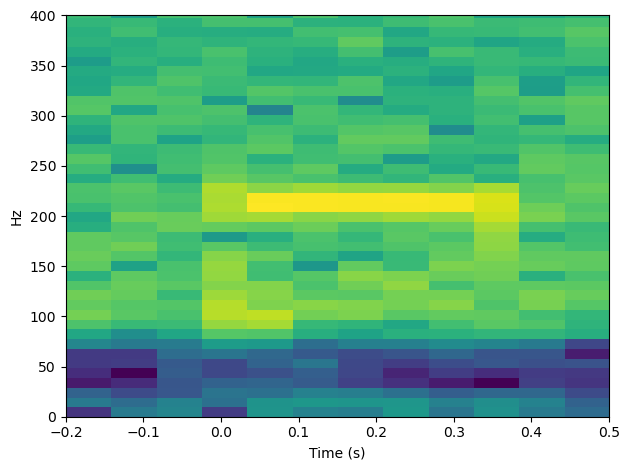

In [23]:
cz_210 = epochs['13', '23', '33', '43', '53', '63'].average()
fig = cz_210.plot(titles = '210 Hz', ylim=dict(eeg=[-0.15, 0.15]))
fig.savefig('../figs/FFR-tone-3-time-domain.png')
x = cz_210.get_data()
x = x.flatten()
plt.plot(x)
plt.tight_layout()
plt.savefig('../figs/FFR-tone-3-time-domain-2.png')
plt.title('210 Hz')
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs, xextent = (-0.2, 0.5))
plt.ylim(0, 400)
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.tight_layout()
plt.savefig('../figs/FFR-tone-3-spectrogram.png')
plt.show()

## Plot raw aux

In [38]:
fs = 5000
TMIN = -0.2
TMAX = 0.5
files = glob.glob('../data/raw/*.vhdr')
aux_epochs = []
limit = 5

for i, file in enumerate(files):
    sub = re.findall('sub-(\d{1,2})', file)[0]

    # Skip subs with wrong sampling rate
    if int(sub) <= 10:
        continue

    # Read raw data
    raw = mne.io.read_raw_brainvision(file)

    # Save only aux channel
    raw.set_channel_types({'Aux': 'eeg'})
    raw = raw.pick_channels(['Aux'])

    # Fix event tags
    events, event_ids = mne.events_from_annotations(raw)
    events = events[events[:,2] != event_ids['New Segment/'], :]
    events[:,0] = events[:,0] + 500 # Fix timestamp
    annot = mne.annotations_from_events(events, sfreq = raw.info['sfreq'])
    raw = raw.set_annotations(annot)

    # Epoch
    sub_aux_epochs = mne.Epochs(
        raw,
        events,
        tmin = TMIN,
        tmax = TMAX,
        baseline = (TMIN, 0.),
        preload = True
    )

    if aux_epochs == []:
        aux_epochs = sub_aux_epochs
    else:
        aux_epochs = mne.concatenate_epochs([aux_epochs, sub_aux_epochs])

    if i == limit:
        break
    # break

Extracting parameters from ../data/raw/sub-26_task-expectations.vhdr...
Setting channel info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Aux']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['leog', 'reog', 'Aux']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:19: RuntimeWarning: The unit for channel(s) Aux has changed fro

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 43', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 53', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63']
Not setting metadata
4745 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 4745 events and 3501 original time points ...
0 bad epochs dropped
Extracting parameters from ../data/raw/sub-18_task-expectations.vhdr...
Setting channel info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 43', 'Stim

/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Aux']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['leog', 'reog', 'Aux']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:19: RuntimeWarning: The unit for channel(s) Aux has changed fro

Not setting metadata
4566 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 4566 events and 3501 original time points ...
0 bad epochs dropped
Not setting metadata
9311 matching events found
Applying baseline correction (mode: mean)


/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:42: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  aux_epochs = mne.concatenate_epochs([aux_epochs, sub_aux_epochs])


Extracting parameters from ../data/raw/sub-41_task-expectations.vhdr...
Setting channel info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Aux']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['leog', 'reog', 'Aux']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:19: RuntimeWarning: The unit for channel(s) Aux has changed fro

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 43', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 53', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63']
Not setting metadata
4666 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 4666 events and 3501 original time points ...
0 bad epochs dropped
Not setting metadata
13977 matching events found


/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:42: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  aux_epochs = mne.concatenate_epochs([aux_epochs, sub_aux_epochs])


Applying baseline correction (mode: mean)
Extracting parameters from ../data/raw/sub-19_task-expectations.vhdr...
Setting channel info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Aux']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:16: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['leog', 'reog', 'Aux']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file)
/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:19: RuntimeWarning: The unit for channel(s) Aux has changed fro

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 43', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 53', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63']
Not setting metadata
4489 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 4489 events and 3501 original time points ...
0 bad epochs dropped


/scratch/local/jobs/21926946/ipykernel_366618/2282734308.py:42: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  aux_epochs = mne.concatenate_epochs([aux_epochs, sub_aux_epochs])


Not setting metadata
18466 matching events found
Applying baseline correction (mode: mean)


In [25]:
# Adjust timestamp by computed event lag
adjusted_events = aux_epochs.events
adjusted_events[:, 0] = adjusted_events[:,0] + 67
aux_epochs.events = adjusted_events

Need more than one channel to make topography for eeg. Disabling interactivity.


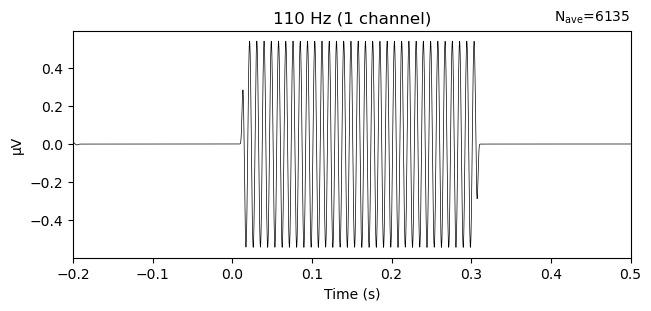

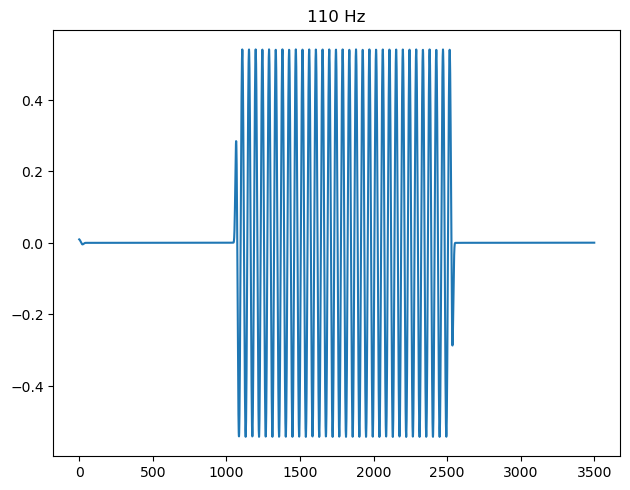

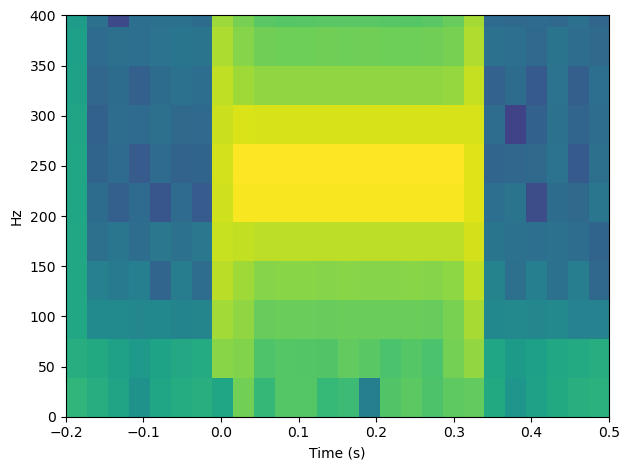

In [40]:
fs = 10000
aux_110 = aux_epochs['11', '21', '31', '41', '51', '61'].average(picks = ['Aux'])
fig = aux_110.plot(titles = '110 Hz', scalings=dict(eeg=1)) #ylim=dict(eeg=[-600000, 600000]))
# fig.savefig('../figs/AUX-tone-1-time-domain.png')
x = aux_110.get_data()
x = x.flatten()
plt.plot(x)
plt.tight_layout()
# plt.savefig('../figs/AUX-tone-1-time-domain-2.png')
plt.title('110 Hz')
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs, xextent = (-0.2, 0.5))
plt.ylim(0, 400)
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.tight_layout()
# plt.savefig('../figs/AUX-tone-1-spectrogram.png')
plt.show()

Need more than one channel to make topography for eeg. Disabling interactivity.


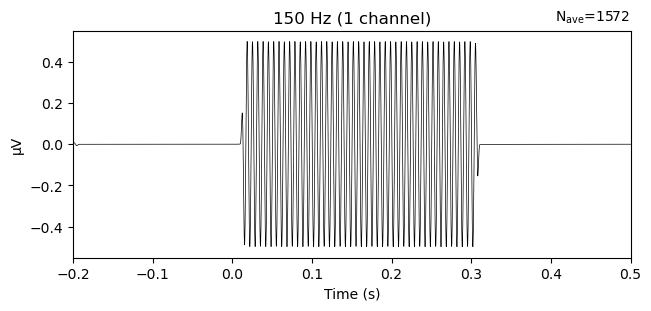

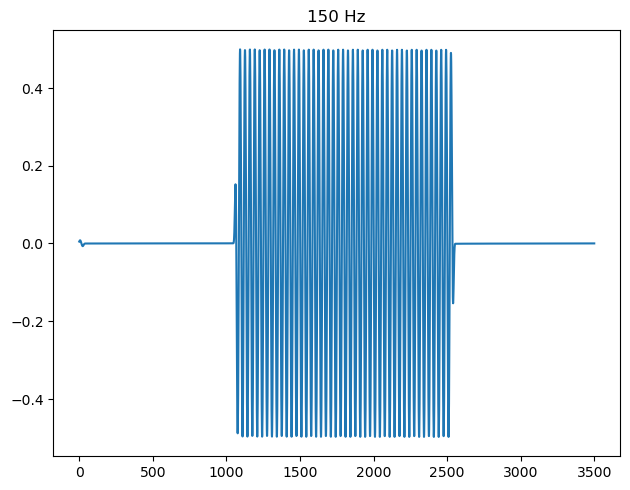

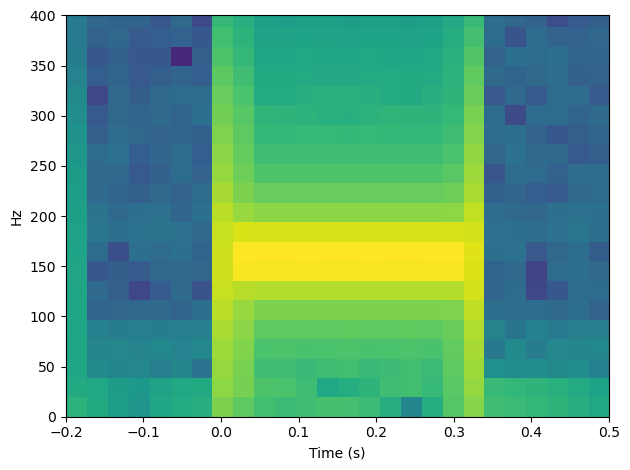

In [32]:
aux_150 = aux_epochs['12', '22', '32', '42', '52', '62'].average(picks = ['Aux'])
fig = aux_150.plot(titles = '150 Hz', scalings=dict(eeg=1), ylim = dict(eeg=[-0.55, 0.55]))
fig.savefig('../figs/AUX-tone-2-time-domain.png')
x = aux_150.get_data()
x = x.flatten()
plt.plot(x)
plt.tight_layout()
plt.savefig('../figs/AUX-tone-2-time-domain-2.png')
plt.title('150 Hz')
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs, xextent = (-0.2, 0.5))
plt.ylim(0, 400)
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.tight_layout()
plt.savefig('../figs/AUX-tone-2-spectrogram.png')
plt.show()

Need more than one channel to make topography for eeg. Disabling interactivity.


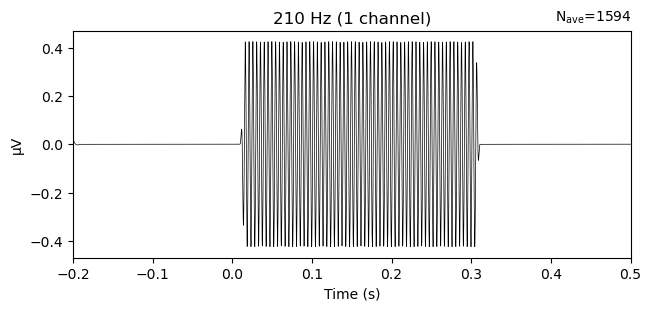

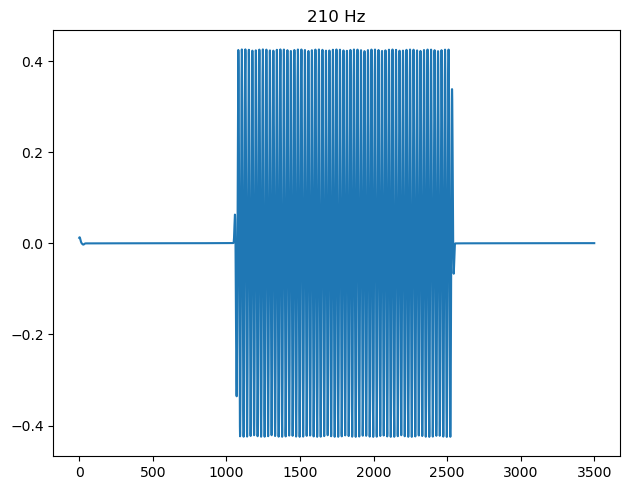

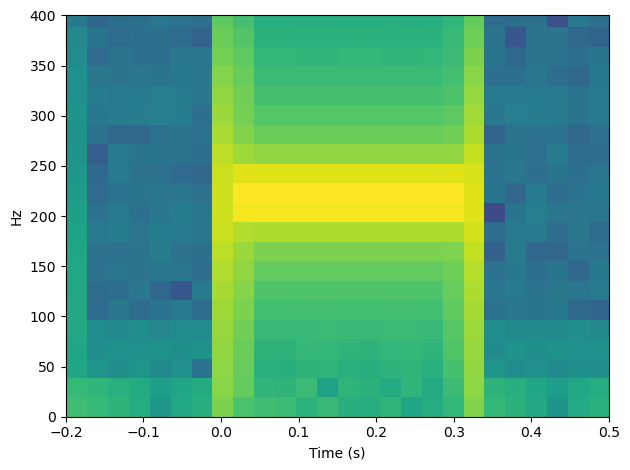

In [37]:
aux_210 = aux_epochs['13', '23', '33', '43', '53', '63'].average(picks = ['Aux'])
fig = aux_210.plot(titles = '210 Hz', scalings=dict(eeg=1), ylim = dict(eeg=[-0.47, 0.47]))
fig.savefig('../figs/AUX-tone-3-time-domain.png')
x = aux_210.get_data()
x = x.flatten()
plt.plot(x)
plt.tight_layout()
plt.savefig('../figs/AUX-tone-3-time-domain-2.png')
plt.title('210 Hz')
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs, xextent = (-0.2, 0.5))
plt.ylim(0, 400)
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.tight_layout()
plt.savefig('../figs/AUX-tone-3-spectrogram.png')
plt.show()

In [10]:
list(aux_epochs.items())

AttributeError: 'Epochs' object has no attribute 'items'

In [ ]:
# Load raw data
# file = '../data/raw/sub-23_task-expectations.vhdr'
# raw = mne.io.read_raw_brainvision(file, preload = True)
# raw.set_channel_types({'cz': 'stim'})
events, event_ids = mne.events_from_annotations(raw)
# events[:,0] = events[:,0] + 500 # Fix timestamp
annot = mne.annotations_from_events(events, sfreq = raw.info['sfreq'])
raw.set_annotations(annot)
cz = raw.pick('cz')
cz = mne.Epochs(
    cz,
    events, # same events as FFR epochs
    tmin = -0.1,
    tmax = 0.4, # only prestim
    event_id = event_ids,
    baseline = None,
    preload = True
)

In [ ]:
# # Load raw data
# file = '../data/raw/sub-23_task-expectations.vhdr'
raw = mne.io.read_raw_brainvision(file, preload = True)
cz = raw.pick('cz')
events, event_ids = mne.events_from_annotations(raw)
# events[:,0] = events[:,0] + 500 # Fix timestamp
annot = mne.annotations_from_events(events, sfreq = raw.info['sfreq'])
cz.set_annotations(annot)
cz = mne.Epochs(
    cz,
    events, # same events as FFR epochs
    tmin = -0.1,
    tmax = 0.4, # only prestim
    event_id = event_ids,
    baseline = None,
    preload = True
)
cz = raw.pick('cz')
events, event_ids = mne.events_from_annotations(raw) # somehow have to run parts of this twice to get the event ids to be correct, erg
# events[:,0] = events[:,0] + 500 # Fix timestamp
annot = mne.annotations_from_events(events, sfreq = raw.info['sfreq'])
cz.set_annotations(annot)
cz = mne.Epochs(
    cz,
    events, # same events as FFR epochs
    tmin = -0.1,
    tmax = 0.5, # only prestim
    event_id = event_ids,
    baseline = None,
    preload = True
)

In [ ]:
cz_110 = cz['11', '21', '31', '41', '51', '61'].average(picks = 'cz')

# Plot spectrogram
fs = 5000
x = cz_110.get_data()
x = x.flatten()
plt.subplot(211)
plt.plot(x)
plt.title('150 Hz')
plt.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs)
plt.ylim(0, 400)
plt.show()

In [ ]:
# Plot signal
cz_110 = cz['11', '21', '31', '41', '51', '61'].average()
cz_110.plot(titles = '110 Hz')
# cz_150 = cz['12', '22', '32', '42', '52', '62'].average()
# cz_150.plot(titles = '150 Hz')
# cz_210 = cz['13', '23', '33', '43', '53', '63'].average()
# cz_210.plot(titles = '210 Hz')

### Plot grand-average FFR

In [ ]:
files = glob.glob('../data/bids/derivatives/preprocess_ffr/sub-*/*fif.gz')
epochs = []
for file in files:
    if epochs == []:
        epochs = mne.read_epochs(file)
        continue
    sub_epochs = mne.read_epochs(file)
    try:
        epochs = mne.concatenate_epochs([epochs, sub_epochs])
    except:
        continue
    # break

In [ ]:
# Plot signal
evokeds_110 = epochs['11', '21', '31', '41', '51', '61'].average()
evokeds_110.plot(titles = '110 Hz')
evokeds_150 = epochs['12', '22', '32', '42', '52', '62'].average()
evokeds_150.plot(titles = '150 Hz')
evokeds_210 = epochs['13', '23', '33', '43', '53', '63'].average()
evokeds_210.plot(titles = '210 Hz')

In [ ]:
# Plot spectrogram
fs = 5000
x = evokeds_110.get_data()
x = x.flatten()
plt.subplot(211)
plt.plot(x)
plt.title('100 Hz')
plt.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs)
plt.ylim(0, 400)
plt.show()

In [ ]:
# Plot spectrogram
fs = 5000
x = evokeds_150.get_data()
x = x.flatten()
plt.subplot(211)
plt.plot(x)
plt.title('150 Hz')
plt.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs)
plt.ylim(0, 400)
plt.show()

In [ ]:
# Plot spectrogram
fs = 5000
x = evokeds_210.get_data()
x = x.flatten()
plt.subplot(211)
plt.plot(x)
plt.title('210 Hz')
plt.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs)
plt.ylim(0,400)
plt.show()